# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#load csv file
data=pd.read_csv('Pima-Diabetes-India.csv')
print(data)

     Preg  Plas  Pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [2]:
#using head() for printing first 10 samples
print(data.head(10))

   Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


# 3. Print the datatypes of each column and the shape of the dataset

In [3]:
#for datatype
print(data.info())
#for shape of datase
print('Number of rows and columns:',data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Number of rows and columns: (768, 9)


In [4]:
print(data.columns)
data1=data.copy()
data1

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [5]:
#for cheching which columns have 0 values
from statistics import median
med_Preg=median(data1['Preg'])
print('median od Preg:',med_Preg)
med_Plas=median(data1['Plas'])
print('median od Plas:',med_Plas)
med_mass=median(data1['mass'])
print('median od Preg:',med_mass)
med_skin=median(data1['skin'])
print('median od skin:',med_skin)
med_Pres=median(data1['Pres'])
print('median of Pres:',med_Pres)
med_test=median(data1['test'])
print('median of test:',med_test)
#replacing 0 with median value
data1['Preg'] = data1['Preg'].replace(0,med_Preg )
data1['Plas'] = data1['Plas'].replace(0,med_Plas )
data1['skin'] = data1['skin'].replace(0,med_skin )
data1['Pres'] = data1['Pres'].replace(0,med_Pres )
data1['mass'] = data1['mass'].replace(0,med_mass )
data1['test'] = data1['test'].replace(0,med_test )

print(data1.head(10))

median od Preg: 3.0
median od Plas: 117.0
median od Preg: 32.0
median od skin: 23.0
median of Pres: 72.0
median of test: 30.5
   Preg  Plas  Pres  skin   test  mass   pedi  age  class
0     6   148    72    35   30.5  33.6  0.627   50      1
1     1    85    66    29   30.5  26.6  0.351   31      0
2     8   183    64    23   30.5  23.3  0.672   32      1
3     1    89    66    23   94.0  28.1  0.167   21      0
4     3   137    40    35  168.0  43.1  2.288   33      1
5     5   116    74    23   30.5  25.6  0.201   30      0
6     3    78    50    32   88.0  31.0  0.248   26      1
7    10   115    72    23   30.5  35.3  0.134   29      0
8     2   197    70    45  543.0  30.5  0.158   53      1
9     8   125    96    23   30.5  32.0  0.232   54      1


# 5. Print the descriptive statistics of each & every column using describe() function

In [6]:
data1.describe().T


,count,mean,std,min,25%,50%,75%,max
Preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

           Preg      Plas      Pres      skin      test      mass      pedi  \
Preg   1.000000  0.149326  0.247530  0.060706 -0.059580  0.080540 -0.016151   
Plas   0.149326  1.000000  0.218937  0.172143  0.357573  0.231400  0.137327   
Pres   0.247530  0.218937  1.000000  0.147809 -0.028721  0.281132 -0.002378   
skin   0.060706  0.172143  0.147809  1.000000  0.238188  0.546951  0.142977   
test  -0.059580  0.357573 -0.028721  0.238188  1.000000  0.189022  0.178029   
mass   0.080540  0.231400  0.281132  0.546951  0.189022  1.000000  0.153506   
pedi  -0.016151  0.137327 -0.002378  0.142977  0.178029  0.153506  1.000000   
age    0.538169  0.266909  0.324915  0.054514 -0.015413  0.025744  0.033561   
class  0.245466  0.492782  0.165723  0.189065  0.148457  0.312249  0.173844   

            age     class  
Preg   0.538169  0.245466  
Plas   0.266909  0.492782  
Pres   0.324915  0.165723  
skin   0.054514  0.189065  
test  -0.015413  0.148457  
mass   0.025744  0.312249  
pedi   0.0335

<AxesSubplot:>

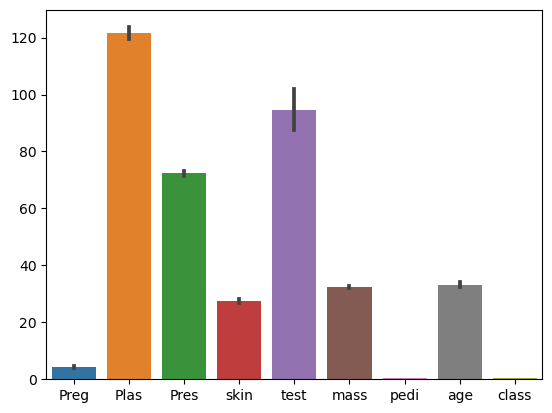

In [7]:
correlation=data1.corr()
print(correlation)
sb.barplot(data=data1)

# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

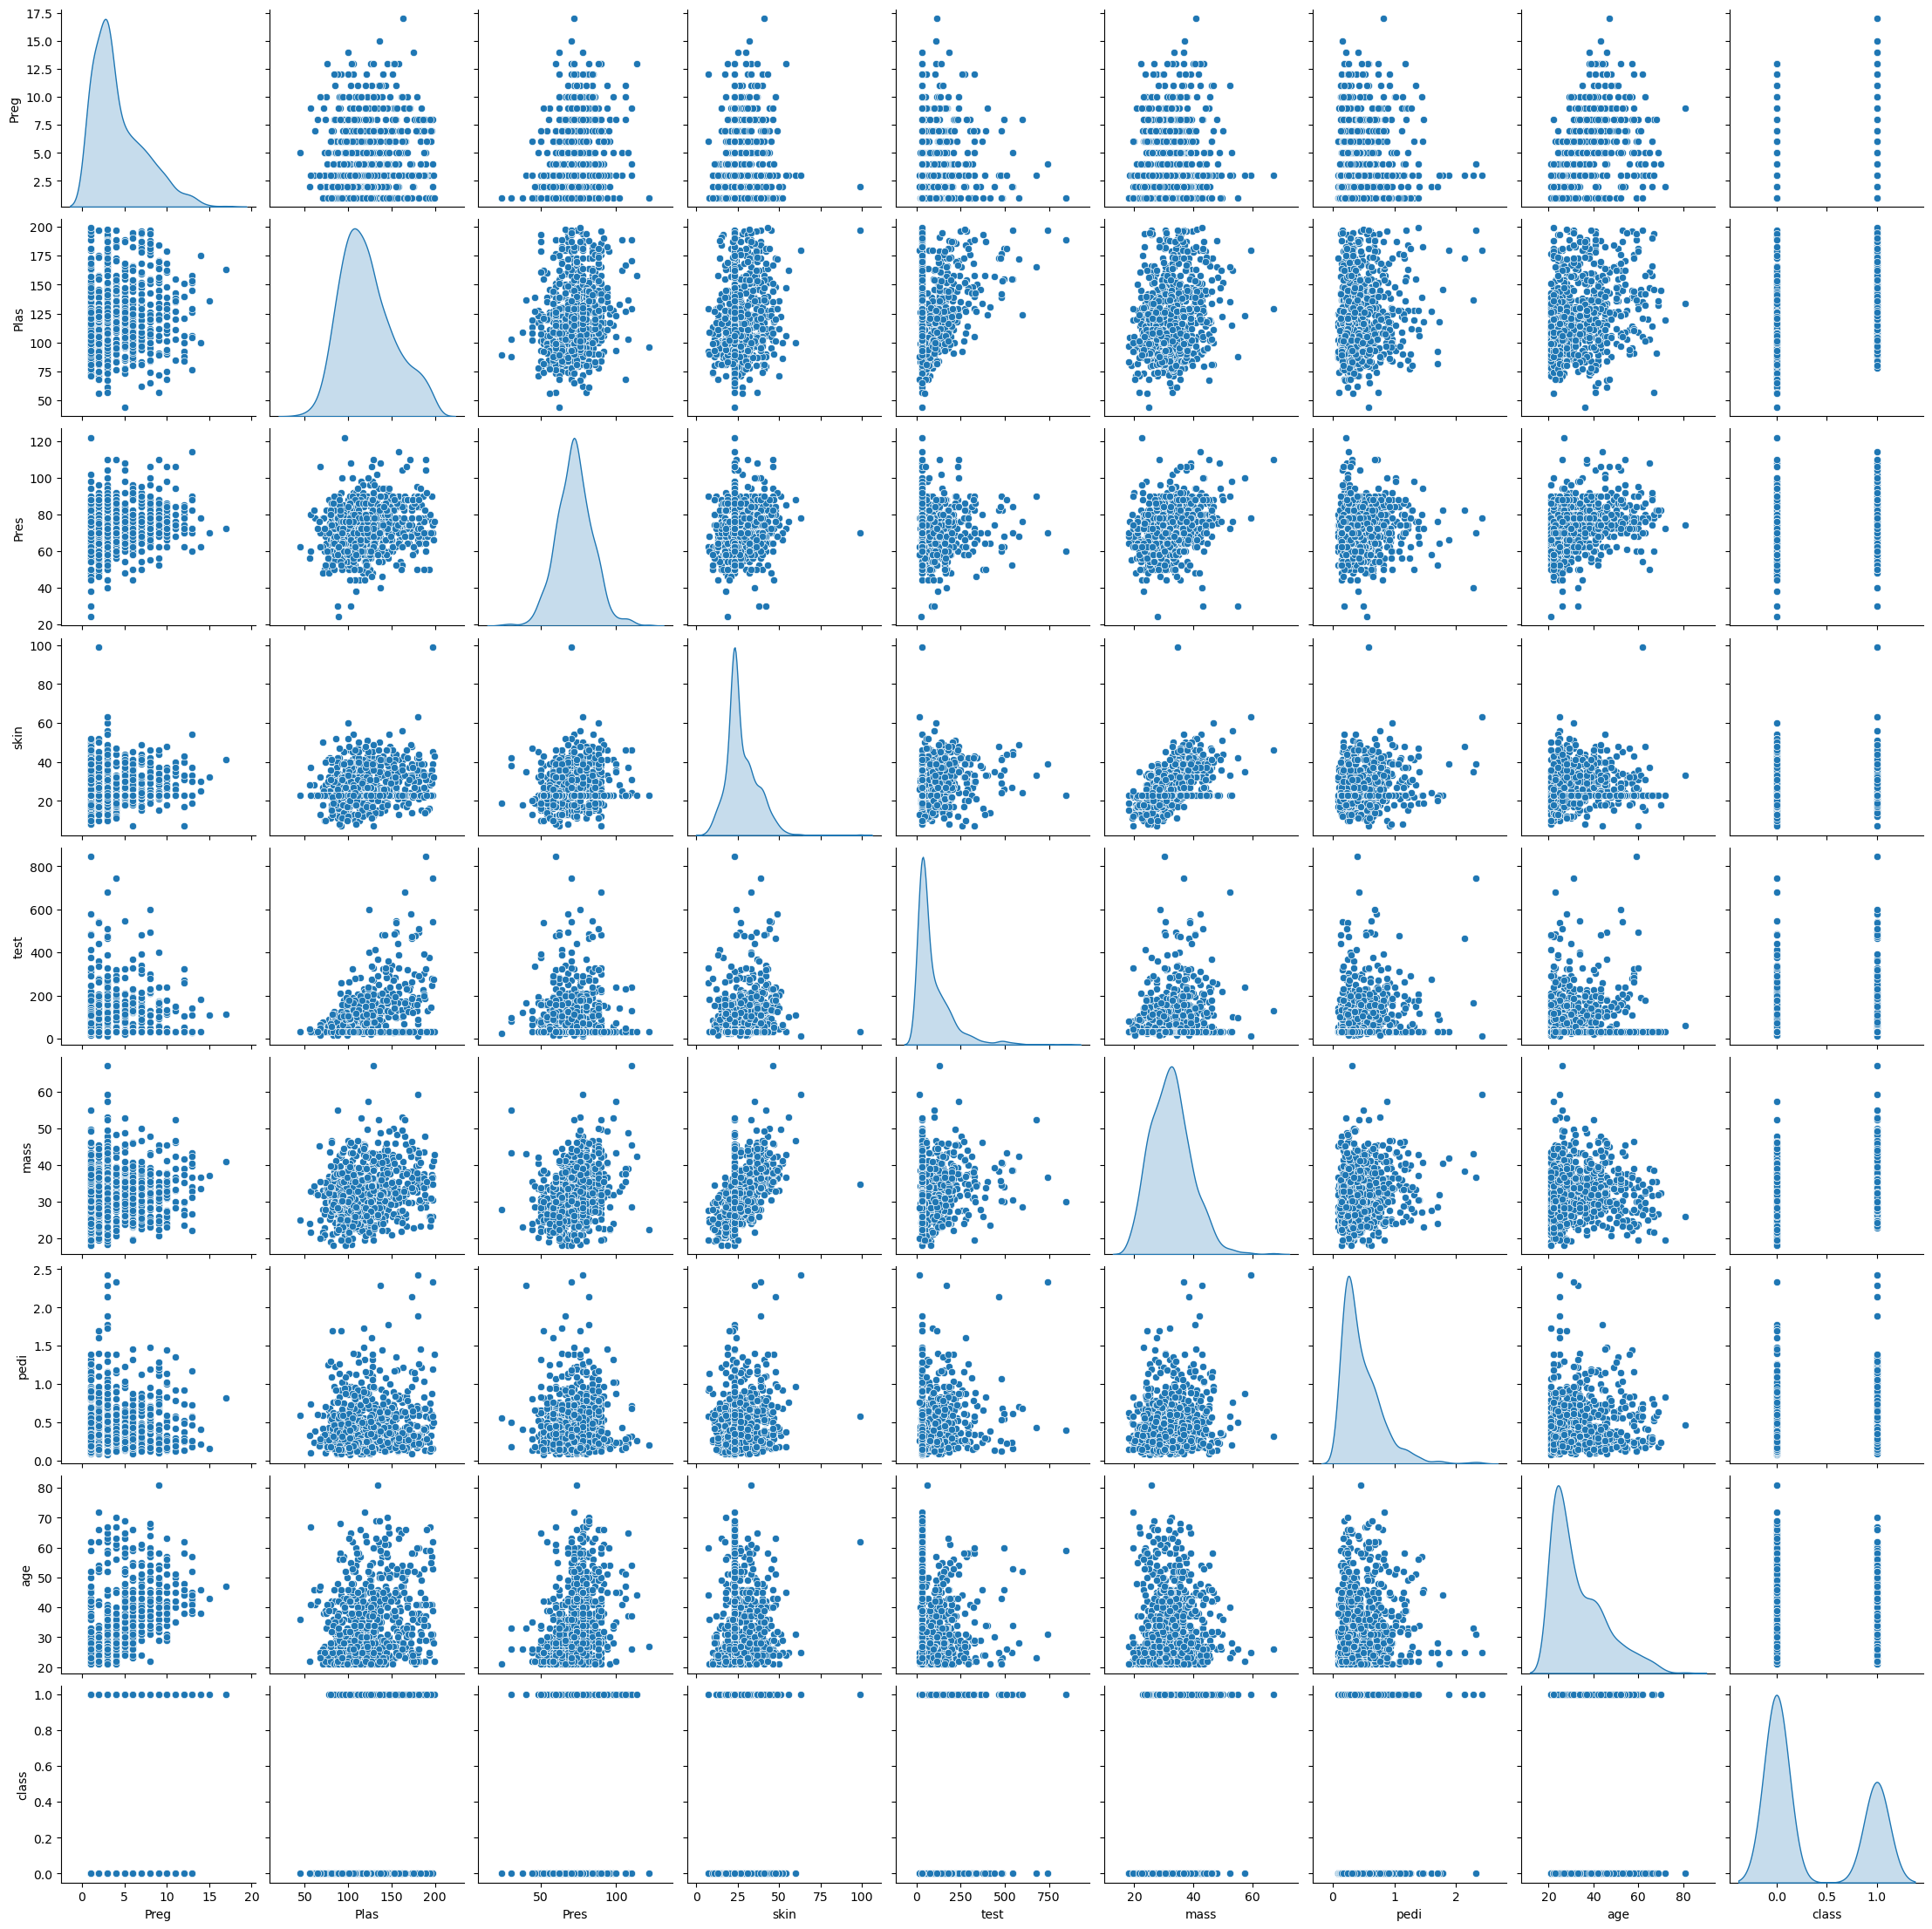

In [8]:
sb.pairplot(data=data1,diag_kind='kde')

Check for correlation between variables whose values are >0.8

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [9]:
X = data1.drop('class',axis=1)     # Predictor feature columns 
Y = data1['class']   # Predicted class 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [10]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1)

# 10. Print the accuracy of the model & print the confusion matrix

0.7272727272727273


<AxesSubplot:>

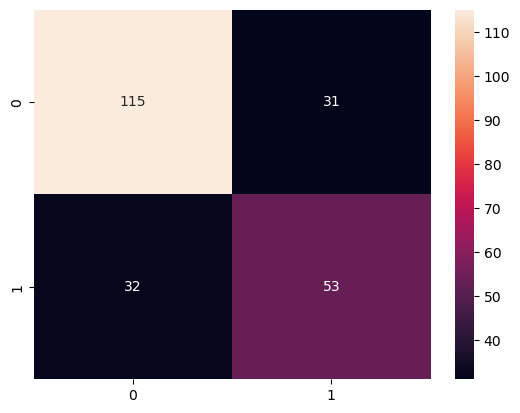

In [19]:
print(dTree.score(x_test , y_test))
y_predict = dTree.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,ypred)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict, labels=[0, 1])
sb.heatmap(cm, annot=True ,fmt='g')